In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/Original Data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2019__Data_for_Calendar_Year_2018__20231026.csv",
              low_memory=False)
df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,Address 2,City,...,Last Modified Date - Water Meters,Generation Date,Release Date,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1009970029,1022631,1155 Avenue of the Americas,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.756631,-73.982826,105.0,4.0,119.0,Midtown-Midtown South
1,8139,200,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1013150001,1037545,200 East 42nd St.,Not Available,Manhattan,...,03/08/2019 09:50 AM EST,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.750698,-73.974306,106.0,4.0,88.0,Turtle Bay-East Midtown
2,8604,114,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1009990019,1022667,114 West 47th st,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.758310,-73.982504,105.0,4.0,125.0,Midtown-Midtown South
3,8841,733,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1013190047,1037596,733 Third Avenue,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.753074,-73.972753,106.0,4.0,90.0,Turtle Bay-East Midtown
4,11809,Conde Nast Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2018,1009950005,1085682,4 Times Square,Not Available,Manhattan,...,Not Available,4/30/2019 11:53,4/30/2019 11:57,MANHATTAN,40.756181,-73.986244,105.0,4.0,119.0,Midtown-Midtown South


In [3]:
df.shape

(25245, 253)

In [4]:
len(df[df['Primary Property Type - Portfolio Manager-Calculated']=='Courthouse'])

24

In [5]:
df['Courthouse - Gross Floor Area (ft²)'].value_counts()

Not Available    25218
922927               1
21500                1
12300                1
18000                1
63200                1
2446                 1
308200               1
291589               1
320535               1
648000               1
26100                1
59300                1
501383               1
490000               1
550600               1
43233                1
322300               1
491000               1
795700               1
467000               1
54300                1
25700                1
264100               1
49500                1
99000                1
19395                1
182000               1
Name: Courthouse - Gross Floor Area (ft²), dtype: int64

In [6]:
irr_features=['Parent Property Id', 'Parent Property Name', 'Year Ending', 'Primary Property Type - Self Selected', 'National Median Reference Property Type',
             'List of All Property Use Types at Property', '2nd Largest Property Use Type','3rd Largest Property Use Type', 'ENERGY STAR Certification - Year(s) Certified',
             'ENERGY STAR Certification - Last Approval Date', 'Annual Maximum Demand (MM/YYYY)', 'Annual Maximum Demand (Meter Name (Meter ID))',
             'Estimated Data Flag - Electricity (Grid Purchase)', 'Estimated Data Flag - Natural Gas', 'Estimated Data Flag - Fuel Oil (No. 2)',
             'Estimated Data Flag - Fuel Oil (No. 4)', 'Estimated Data Flag - Fuel Oil (No. 5 and No. 6)', 'Estimated Data Flag - District Steam',
             'CoStar Property ID', 'LEED US Project ID', 'Estimated Data Flag -  Municipally Supplied Potable Water – Outdoor Use', 
             'Alert - Data Center Issue (with Estimates, IT Configuration, or IT Meter)', 'Alert - Gross Floor Area is 0 ft2',
             'Alert - Energy Meter has single entry more than 65 days', 'Alert - Energy Meter has overlaps','Alert - Energy Meter has gaps',
             'Alert - Energy Meter has less than 12 full calendar months of data', 'Alert - Energy - No meters selected for metrics',
             'Alert - Property has no uses', 'Data Quality Checker Run?', 'Data Quality Checker - Date Run', 'Default Values', 'Estimated Values - Energy',
             'Temporary Values', 'Estimated Values - Water', 'Third Party Certification Date Anticipated', 'Third Party Certification',
             'Third Party Certification Date Achieved', 'Last Modified Date - Property', 'Last Modified Date - Electric Meters',
             'Last Modified Date - Gas Meters', 'Last Modified Date - Non-Electric Non-Gas Energy Meters', 'Last Modified Date - Water Meters',
             'Generation Date', 'Release Date']
len(irr_features)

45

In [7]:
df['Fuel Oil #2 Use (kBtu)']

0        Not Available
1        Not Available
2        Not Available
3        Not Available
4        Not Available
             ...      
25240    Not Available
25241    Not Available
25242    Not Available
25243    Not Available
25244    Not Available
Name: Fuel Oil #2 Use (kBtu), Length: 25245, dtype: object

In [8]:
df['Estimated Data Flag - Fuel Oil (No. 2)'].value_counts()

Not Available    19604
No                5548
Yes                 93
Name: Estimated Data Flag - Fuel Oil (No. 2), dtype: int64

In [9]:
df['Fuel Oil #2 Use (kBtu)'].value_counts()

Not Available    20794
0                  451
276000              54
414000              44
207000              33
                 ...  
16136754.1           1
718979.9             1
137623               1
3628979.6            1
16065951.5           1
Name: Fuel Oil #2 Use (kBtu), Length: 3489, dtype: int64

In [10]:
df.loc[:,['Estimated Data Flag - Fuel Oil (No. 2)', 'Fuel Oil #2 Use (kBtu)']]

,Estimated Data Flag - Fuel Oil (No. 2),Fuel Oil #2 Use (kBtu)
0,Not Available,Not Available
1,Not Available,Not Available
2,Not Available,Not Available
3,Not Available,Not Available
4,Not Available,Not Available
...,...,...
25240,No,Not Available
25241,Not Available,Not Available
25242,Not Available,Not Available
25243,Not Available,Not Available


In [11]:
df.drop(columns=irr_features, inplace=True)

In [12]:
df.shape

(25245, 208)

In [13]:
df['Primary Property Type - Portfolio Manager-Calculated'].value_counts().nlargest(10)

Multifamily Housing               17290
Office                             2190
K-12 School                        1518
Hotel                               437
Non-Refrigerated Warehouse          368
Retail Store                        239
Manufacturing/Industrial Plant      223
Self-Storage Facility               213
Other                               211
College/University                  172
Name: Primary Property Type - Portfolio Manager-Calculated, dtype: int64

In [14]:
df['Primary Property Type - Portfolio Manager-Calculated'].value_counts().nsmallest(10)

Stadium (Open)                           1
Mailing Center/Post Office               1
Fast Food Restaurant                     1
Lifestyle Center                         1
Veterinary Office                        2
Convenience Store without Gas Station    2
Zoo                                      3
Ambulatory Surgical Center               3
Other - Utility                          3
Vocational School                        3
Name: Primary Property Type - Portfolio Manager-Calculated, dtype: int64

In [15]:
df['Primary Property Type - Portfolio Manager-Calculated'].nunique()

73

In [16]:
df[df['Primary Property Type - Portfolio Manager-Calculated']=='Ambulatory Surgical Center']

,Property Id,Property Name,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,Address 2,City,County,Postcode,Primary Property Type - Portfolio Manager-Calculated,...,Convenience Store With Gas Station - Number of Open or Closed Refrigeration/Freezer Units,"Convenience Store With Gas Station - Open or Closed Refrigeration Density (Number per 1,000 ft²)","Senior Care Community - Living Unit Density (Number per 1,000 ft²)",Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
3026,2674629,WCMC - WGC (YAB) Building,1-01464-0028,1085699;1045586,1305 York Ave,Not Available,New York,Not Available,10021,Ambulatory Surgical Center,...,Not Available,Not Available,Not Available,MANHATTAN,40.765346,-73.954857,108.0,5.0,124.0,Lenox Hill-Roosevelt Island
10044,4410386,MSKCC Ambulatory Care: Josie Robertson Surgery...,1-01456-0021,1045285,1133 York Ave,Not Available,New York,Not Available,10065,Ambulatory Surgical Center,...,Not Available,Not Available,Not Available,MANHATTAN,40.760097,-73.958687,108.0,5.0,10602.0,Lenox Hill-Roosevelt Island
10733,4789955,Ambulatory Care Center,1-00918-7501,1020338,240 E. 38th St,Not Available,New York,Not Available,10016,Ambulatory Surgical Center,...,Not Available,Not Available,Not Available,MANHATTAN,40.747681,-73.974975,106.0,4.0,78.0,Murray Hill-Kips Bay


In [17]:
def findNa(data):
    cols_with_na=data.eq("Not Available").any()
    na_list=cols_with_na[cols_with_na].index.to_list()
    na_list_count=df[na_list].eq('Not Available').sum()
    return na_list_count

In [18]:
large_na_count=findNa(df)

In [19]:
large_na_features=large_na_count[large_na_count>20000].index.tolist()

In [20]:
large_na_features

['Address 2',
 'County',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Kerosene Use (kBtu)',
 'Propane Use (kBtu)',
 'District Steam Use (kBtu)',
 'District Hot Water Use (kBtu)',
 'District Chilled Water Use (kBtu)',
 'Electricity Use – Generated from Onsite Renewable Systems and Used Onsite (kBtu)',
 'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
 'Electricity Use – Generated from Onsite Renewable Systems and Exported (kWh)',
 'Annual Maximum Demand (kW)',
 'Green Power - Onsite (kWh)',
 'Avoided Emissions - Onsite Green Power (Metric Tons CO2e)',
 'Percent of RECs Retained',
 'Percent of Total Electricity Generated from Onsite Renewable Systems',
 'Ambulatory Surgical Center - Gross Floor Area (ft²)',
 'Automobile Dealership - Gross Floor Area (ft²)',
 'Bank Branch - Gross Floor Area (ft²)',
 'Bank Branch - Number

In [21]:
len(large_na_features)

127

In [22]:
large_na_features.remove('3rd Largest Property Use Type - Gross Floor Area (ft²)')

In [23]:
df

,Property Id,Property Name,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,Address 2,City,County,Postcode,Primary Property Type - Portfolio Manager-Calculated,...,Convenience Store With Gas Station - Number of Open or Closed Refrigeration/Freezer Units,"Convenience Store With Gas Station - Open or Closed Refrigeration Density (Number per 1,000 ft²)","Senior Care Community - Living Unit Density (Number per 1,000 ft²)",Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,7365,1155,1009970029,1022631,1155 Avenue of the Americas,Not Available,Manhattan,Not Available,10036,Office,...,Not Available,Not Available,Not Available,MANHATTAN,40.756631,-73.982826,105.0,4.0,119.0,Midtown-Midtown South
1,8139,200,1013150001,1037545,200 East 42nd St.,Not Available,Manhattan,Not Available,10017,Office,...,Not Available,Not Available,Not Available,MANHATTAN,40.750698,-73.974306,106.0,4.0,88.0,Turtle Bay-East Midtown
2,8604,114,1009990019,1022667,114 West 47th st,Not Available,Manhattan,Not Available,10036,Financial Office,...,Not Available,Not Available,Not Available,MANHATTAN,40.758310,-73.982504,105.0,4.0,125.0,Midtown-Midtown South
3,8841,733,1013190047,1037596,733 Third Avenue,Not Available,Manhattan,Not Available,10017,Office,...,Not Available,Not Available,Not Available,MANHATTAN,40.753074,-73.972753,106.0,4.0,90.0,Turtle Bay-East Midtown
4,11809,Conde Nast Building,1009950005,1085682,4 Times Square,Not Available,Manhattan,Not Available,10036,Office,...,Not Available,Not Available,Not Available,MANHATTAN,40.756181,-73.986244,105.0,4.0,119.0,Midtown-Midtown South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25240,7538695,91 Davis Avenue and 102 Bard Avenue,5-00138-0258; 5-00138-0100,5003580; 5003529,91 Davis Avenue,Not Available,Staten Island,Not Available,10310,Multifamily Housing,...,Not Available,Not Available,Not Available,STATEN IS,40.642078,-74.110312,501.0,49.0,97.0,West New Brighton-New Brighton-St. George
25241,7538696,Polyclinic,1-01041-0011,1082646,335 W 50 ST,Not Available,New York,Not Available,10019,Multifamily Housing,...,Not Available,Not Available,Not Available,MANHATTAN,40.762996,-73.987766,104.0,3.0,133.0,Clinton
25242,7538772,1080 Holdings,4035410023,4085369,1080 Wyckoff Ave.,Not Available,Queens,Not Available,11385,Other,...,Not Available,Not Available,Not Available,QUEENS,40.694625,-73.902417,405.0,34.0,559.0,Ridgewood
25243,7538791,Child1_Manhattan Beach,3871927,3245695,156 West End Avenue,Not Available,Brooklyn,Kings,11235,Multifamily Housing,...,Not Available,Not Available,Not Available,BROOKLYN,40.577836,-73.953079,315.0,48.0,61004.0,Brighton Beach


In [24]:
df.drop(columns=large_na_features, inplace=True)

In [25]:
df.shape

(25245, 82)

In [26]:
df.columns

Index(['Property Id', 'Property Name', 'NYC Borough, Block and Lot (BBL)',
       'NYC Building Identification Number (BIN)', 'Address 1', 'City',
       'Postcode', 'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'ENERGY STAR Score',
       'ENERGY STAR Certification - Eligibility', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)',
       '% Difference from National Median Site EUI', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity 

In [27]:
cols_specific=['Multifamily Housing - Gross Floor Area (ft²)',
       'Multifamily Housing - Government Subsidized Housing',
       'Multifamily Housing - Number of Bedrooms',
       'Multifamily Housing - Number of Laundry Hookups in All Units',
       'Multifamily Housing - Number of Laundry Hookups in Common Area(s)',
       'Multifamily Housing - Total Number of Residential Living Units',
       'Multifamily Housing - Percent That Can Be Cooled',
       'Multifamily Housing - Percent That Can Be Heated',
       'Multifamily Housing - Resident Population Type',
       'Multifamily Housing - Number of Bedrooms Density (Number per 1,000 ft²)',
       'Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 ft²)',
       'Multifamily Housing - Number of Residential Living Units in a High-Rise Building (10 or more Stories)',
       'Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 ft²)',
       'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories)',
       'Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 ft²)',]

In [28]:
df.drop(columns=cols_specific, inplace=True)

In [29]:
df.shape

(25245, 67)

In [30]:
def col_na_count(df):
    cols=df.isna().sum()>0
    return (cols[cols]).index.tolist()

In [31]:
col_na_count(df)

['Borough',
 'Latitude',
 'Longitude',
 'Community Board',
 'Council District',
 'Census Tract',
 'NTA']

In [32]:
import os

def save_to_folder(data, itn):
    os.makedirs('data/CleanedData/Energy_Water_Disclosure/Attempt 2', exist_ok=True)
    data.to_csv(f'data/CleanedData/Energy_Water_Disclosure/Attempt 2/Iteration_{itn}.csv',index=False)

In [33]:
df.shape

(25245, 67)

In [34]:
save_to_folder(df, 1)

In [35]:
df.dropna(how='any', inplace=True)

In [36]:
df.shape

(24369, 67)

In [37]:
save_to_folder(df, 2)

In [38]:
findNa(df).sort_values(ascending=False)

3rd Largest Property Use Type - Gross Floor Area (ft²)                                22673
2nd Largest Property Use - Gross Floor Area (ft²)                                     19315
Water Score (Multifamily Only)                                                        15564
Metered Areas  (Water)                                                                12200
Municipally Supplied Potable Water - Indoor Use (kgal)                                11043
Indoor Water Use Intensity (All Water Sources) (gal/ft²)                              11040
Indoor Water Use (All Water Sources) (kgal)                                           11040
Water Use Intensity (All Water Sources) (gal/ft²)                                     10633
Water Use (All Water Sources) (kgal)                                                  10633
Irrigated Area (ft²)                                                                   7603
Water Current Date                                                              

In [39]:
df.drop(columns=['Water Current Date'], inplace=True)

In [40]:
findNa(df).sort_values(ascending=False)

3rd Largest Property Use Type - Gross Floor Area (ft²)                                22673
2nd Largest Property Use - Gross Floor Area (ft²)                                     19315
Water Score (Multifamily Only)                                                        15564
Metered Areas  (Water)                                                                12200
Municipally Supplied Potable Water - Indoor Use (kgal)                                11043
Indoor Water Use (All Water Sources) (kgal)                                           11040
Indoor Water Use Intensity (All Water Sources) (gal/ft²)                              11040
Water Use Intensity (All Water Sources) (gal/ft²)                                     10633
Water Use (All Water Sources) (kgal)                                                  10633
Irrigated Area (ft²)                                                                   7603
Source Energy Use - Adjusted to Current Year (kBtu)                             

In [41]:
df['NYC Borough, Block and Lot (BBL)'].value_counts()

Not Available    124
1019730001        24
2026050040        17
4076720002        16
2039447501        16
                ... 
1-01516-7501       1
1-01489-0008       1
1-01489-0037       1
1-01473-0018       1
3871973            1
Name: NYC Borough, Block and Lot (BBL), Length: 22962, dtype: int64

In [42]:
irrelevant_features_2=['ENERGY STAR Certification - Eligibility', 'NYC Borough, Block and Lot (BBL)',
                      'NYC Building Identification Number (BIN)']
df.drop(columns=irrelevant_features_2, inplace=True)

In [43]:
df.shape

(24369, 63)

In [44]:
findNa(df).sort_values(ascending=False)

3rd Largest Property Use Type - Gross Floor Area (ft²)                                22673
2nd Largest Property Use - Gross Floor Area (ft²)                                     19315
Water Score (Multifamily Only)                                                        15564
Metered Areas  (Water)                                                                12200
Municipally Supplied Potable Water - Indoor Use (kgal)                                11043
Indoor Water Use Intensity (All Water Sources) (gal/ft²)                              11040
Indoor Water Use (All Water Sources) (kgal)                                           11040
Water Use Intensity (All Water Sources) (gal/ft²)                                     10633
Water Use (All Water Sources) (kgal)                                                  10633
Irrigated Area (ft²)                                                                   7603
Source Energy Use - Adjusted to Current Year (kBtu)                             

In [45]:
len(findNa(df))

47

In [46]:
df.shape

(24369, 63)

In [47]:
# Removing records which have very low number of "Non Available" records as compared to our whole dataset

# result=findNa(df).sort_values(ascending=False)
# features_with_low_na=result[result<1000].index.tolist()

In [48]:
# df[features_with_low_na].replace("Not Available", np.nan, inplace=True)

In [49]:
df.replace("Not Available", np.nan, inplace=True)

In [50]:
# df.dropna(how='any', subset=features_with_low_na, inplace=True)

In [51]:
df.shape

(24369, 63)

In [52]:
save_to_folder(df, 3)

In [53]:
null_df=pd.DataFrame(df.isnull().sum(), columns=['Null Count'])
null_df=null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
null_df

,Null Count
3rd Largest Property Use Type - Gross Floor Area (ft²),22673
2nd Largest Property Use - Gross Floor Area (ft²),19315
Water Score (Multifamily Only),15564
Metered Areas (Water),12200
Municipally Supplied Potable Water - Indoor Use (kgal),11043
Indoor Water Use Intensity (All Water Sources) (gal/ft²),11040
Indoor Water Use (All Water Sources) (kgal),11040
Water Use Intensity (All Water Sources) (gal/ft²),10633
Water Use (All Water Sources) (kgal),10633
Irrigated Area (ft²),7603


In [54]:
len(df[df['Primary Property Type - Portfolio Manager-Calculated']=='Multifamily Housing'])

16786

In [55]:
df.loc[df['Primary Property Type - Portfolio Manager-Calculated']!='Multifamily Housing',
      'Water Score (Multifamily Only)']=0

In [56]:
df['Water Score (Multifamily Only)'].isna().sum()

7981

In [57]:
df['Water Score (Multifamily Only)'].value_counts()

0      7583
1      2015
2       459
3       314
100     276
       ... 
57       28
66       27
85       20
93       19
97       14
Name: Water Score (Multifamily Only), Length: 101, dtype: int64

In [58]:
save_to_folder(df, 4)

In [59]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
# null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
# null_df
null_df=null_df[null_df['Null Count']>0]
null_df

,Null Count
Primary Property Type - Portfolio Manager-Calculated,7
Largest Property Use Type,7
Largest Property Use Type - Gross Floor Area (ft²),7
2nd Largest Property Use - Gross Floor Area (ft²),19315
3rd Largest Property Use Type - Gross Floor Area (ft²),22673
Metered Areas (Energy),429
Metered Areas (Water),12200
ENERGY STAR Score,4561
Site EUI (kBtu/ft²),498
Weather Normalized Site EUI (kBtu/ft²),2159


In [60]:
null_df_features=null_df.index.tolist()
null_df_features

['Primary Property Type - Portfolio Manager-Calculated',
 'Largest Property Use Type',
 'Largest Property Use Type - Gross Floor Area (ft²)',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Metered Areas (Energy)',
 'Metered Areas  (Water)',
 'ENERGY STAR Score',
 'Site EUI (kBtu/ft²)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'National Median Site EUI (kBtu/ft²)',
 '% Difference from National Median Site EUI',
 'Site Energy Use (kBtu)',
 'Weather Normalized Site Energy Use (kBtu)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Source EUI (kBtu/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'National Median Source EUI (kBtu/ft²)',
 '% Difference from National Median Source EUI',
 'Source Energy Use - Adjusted to Current Year (kBtu)',
 'Source Energy Use (kBtu)',
 'Weather Normalized Source Energy Use (kBtu)',
 'Natural Gas Use (kBtu)

In [61]:
df[null_df_features].dtypes

Primary Property Type - Portfolio Manager-Calculated                                  object
Largest Property Use Type                                                             object
Largest Property Use Type - Gross Floor Area (ft²)                                    object
2nd Largest Property Use - Gross Floor Area (ft²)                                     object
3rd Largest Property Use Type - Gross Floor Area (ft²)                                object
Metered Areas (Energy)                                                                object
Metered Areas  (Water)                                                                object
ENERGY STAR Score                                                                     object
Site EUI (kBtu/ft²)                                                                   object
Weather Normalized Site EUI (kBtu/ft²)                                                object
National Median Site EUI (kBtu/ft²)                                   

In [62]:
df.dtypes.value_counts()

object     55
float64     5
int64       3
dtype: int64

In [63]:
for i in null_df_features:
    print(df[i].value_counts())

Multifamily Housing                      16786
Office                                    2103
K-12 School                               1483
Hotel                                      421
Non-Refrigerated Warehouse                 352
                                         ...  
Convenience Store without Gas Station        2
Veterinary Office                            2
Mailing Center/Post Office                   1
Fast Food Restaurant                         1
Lifestyle Center                             1
Name: Primary Property Type - Portfolio Manager-Calculated, Length: 71, dtype: int64
Multifamily Housing           16797
Office                         2135
K-12 School                    1490
Hotel                           422
Non-Refrigerated Warehouse      357
                              ...  
Mailing Center/Post Office        2
Veterinary Office                 2
Fast Food Restaurant              1
Single Family Home                1
Lifestyle Center                  1
Na

0            29
169951.6     15
282499.7     11
387603.2      7
236840.9      6
             ..
8186425.2     1
3738484       1
1513179.7     1
9091987.1     1
1560943.3     1
Name: Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu), Length: 22751, dtype: int64
0           23722
4239700         1
11280           1
15720           1
126569.7        1
1845548         1
17228980        1
445144          1
121268.9        1
8653580         1
413833          1
29988           1
Name: Green Power - Offsite (kWh), dtype: int64
0         23755
1402.7        1
3.7           1
5.2           1
41.9          1
610.6         1
7986.5        1
147.3         1
40.1          1
2863          1
136.9         1
9.9           1
Name: Avoided Emissions - Offsite Green Power (Metric Tons CO2e), dtype: int64
0         240
53.2       16
256.3      15
270.8      13
181.3      13
         ... 
639         1
715.7       1
5693.4      1
562.1       1
19.8        1
Name: Total GHG E

In [64]:
df.shape

(24369, 63)

In [65]:
obj=df.select_dtypes(include=['object'])
float64=df.select_dtypes(include=['float64'])
int64=df.select_dtypes(include=['int64'])
obj_cols=obj.columns
float_cols=float64.columns
int_cols=int64.columns

print('Columns with dtypes=object\n')
print(obj_cols)
print('\nColumns with dtypes=float64\n')
print(float_cols)
print('\nColumns with dtypes=int64\n')
print(int_cols)

Columns with dtypes=object

Index(['Property Name', 'Address 1', 'City', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)',
       '% Difference from National Median Site EUI', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)',
       '% Difference from Na

In [66]:
col_dtypes_to_change=['Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)','ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)',
       '% Difference from National Median Site EUI', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)',
       '% Difference from National Median Source EUI',
       'Source Energy Use - Adjusted to Current Year (kBtu)',
       'Source Energy Use (kBtu)',
       'Weather Normalized Source Energy Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Electricity Use - Grid Purchase (kWh)',
       'Weather Normalized Site Electricity (kWh)',
       'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
       'Green Power - Offsite (kWh)',
       'Avoided Emissions - Offsite Green Power (Metric Tons CO2e)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'National Median Total GHG Emissions (Metric Tons CO2e)',
       'eGRID Output Emissions Rate (kgCO2e/MBtu)',
       'Net Emissions (Metric Tons CO2e)',
       'Percent of Electricity that is Green Power',
       'Property GFA - Calculated (Buildings and Parking) (ft²)',
       'Property GFA - Calculated (Buildings) (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Indoor Water Use (All Water Sources) (kgal)',
       'Indoor Water Use Intensity (All Water Sources) (gal/ft²)',
       'Municipally Supplied Potable Water - Indoor Use (kgal)',
       'Water Use Intensity (All Water Sources) (gal/ft²)',
       'Water Score (Multifamily Only)', 'Irrigated Area (ft²)']

df[col_dtypes_to_change]=df[col_dtypes_to_change].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [67]:
df.dtypes.value_counts()

float64    48
object     12
int64       3
dtype: int64

In [68]:
df.dtypes.value_counts()

float64    48
object     12
int64       3
dtype: int64

In [69]:
df.select_dtypes('object').columns

Index(['Property Name', 'Address 1', 'City', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type', 'Year Built', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'Property GFA - Self-Reported (ft²)',
       'Borough', 'NTA'],
      dtype='object')

In [70]:
cols_to_sum=['Largest Property Use Type - Gross Floor Area (ft²)','2nd Largest Property Use - Gross Floor Area (ft²)',
             '3rd Largest Property Use Type - Gross Floor Area (ft²)']

df['Total Property Gross Floor Area']=df[cols_to_sum].sum(axis=1, skipna=True)

In [71]:
df.shape

(24369, 64)

In [72]:
df.drop(columns=cols_to_sum, inplace=True)

In [73]:
df.shape

(24369, 61)

In [74]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
# null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
# null_df
null_df=null_df[null_df['Null Count']>0]
null_df

,Null Count
Primary Property Type - Portfolio Manager-Calculated,7
Largest Property Use Type,7
Metered Areas (Energy),429
Metered Areas (Water),12200
ENERGY STAR Score,4561
Site EUI (kBtu/ft²),498
Weather Normalized Site EUI (kBtu/ft²),2159
National Median Site EUI (kBtu/ft²),330
% Difference from National Median Site EUI,810
Site Energy Use (kBtu),496


In [75]:
df['Property GFA - Self-Reported (ft²)']

0          686,838
1          384,432
2          577,534
3          390,878
4        1,601,977
           ...    
25240       52,820
25241      150,000
25242       49,584
25243       80,390
25244       49,600
Name: Property GFA - Self-Reported (ft²), Length: 24369, dtype: object

In [76]:
df['Property GFA - Self-Reported (ft²)']=pd.to_numeric(df['Property GFA - Self-Reported (ft²)'].str.replace(',',''),
                                                      errors='coerce')

In [77]:
df['Property GFA - Self-Reported (ft²)']

0         686838
1         384432
2         577534
3         390878
4        1601977
          ...   
25240      52820
25241     150000
25242      49584
25243      80390
25244      49600
Name: Property GFA - Self-Reported (ft²), Length: 24369, dtype: int64

In [78]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
# null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
# null_df
null_df=null_df[null_df['Null Count']>0]
null_df

,Null Count
Primary Property Type - Portfolio Manager-Calculated,7
Largest Property Use Type,7
Metered Areas (Energy),429
Metered Areas (Water),12200
ENERGY STAR Score,4561
Site EUI (kBtu/ft²),498
Weather Normalized Site EUI (kBtu/ft²),2159
National Median Site EUI (kBtu/ft²),330
% Difference from National Median Site EUI,810
Site Energy Use (kBtu),496


In [79]:
df['isEqual']=df['Direct GHG Emissions (Metric Tons CO2e)']+df['Indirect GHG Emissions (Metric Tons CO2e)']==df['Total GHG Emissions (Metric Tons CO2e)']
df[df['isEqual']==False][['Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)', 'Total GHG Emissions (Metric Tons CO2e)']]

,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Total GHG Emissions (Metric Tons CO2e)
2,51.2,3104.7,3155.8
4,1991.7,10187.6,12179.3
7,85868.3,-21909.7,63958.6
12,20.5,5428.5,5448.9
15,85.7,621.5,707.1
...,...,...,...
25214,50.9,56.5,107.5
25215,194.9,57.0,251.8
25216,18.4,46.1,64.6
25227,95.2,8.0,103.1


In [80]:
df.shape

(24369, 62)

In [81]:
cols_to_remove=['Direct GHG Emissions (Metric Tons CO2e)', 'Indirect GHG Emissions (Metric Tons CO2e)', 'isEqual']
df.drop(columns=cols_to_remove, inplace=True)

In [82]:
df.shape

(24369, 59)

In [83]:
df['Total GHG Emissions (Metric Tons CO2e)']

0         2520.9
1         2895.1
2         3155.8
3         2826.2
4        12179.3
          ...   
25240      442.8
25241      787.0
25242      132.2
25243        0.0
25244        0.0
Name: Total GHG Emissions (Metric Tons CO2e), Length: 24369, dtype: float64

In [84]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
# null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
# null_df
null_df=null_df[null_df['Null Count']>0]
null_df

,Null Count
Primary Property Type - Portfolio Manager-Calculated,7
Largest Property Use Type,7
Metered Areas (Energy),429
Metered Areas (Water),12200
ENERGY STAR Score,4561
Site EUI (kBtu/ft²),498
Weather Normalized Site EUI (kBtu/ft²),2159
National Median Site EUI (kBtu/ft²),330
% Difference from National Median Site EUI,810
Site Energy Use (kBtu),496


In [85]:
df['Primary Property Type - Portfolio Manager-Calculated'].unique()

array(['Office', 'Financial Office',
       'Hospital (General Medical & Surgical)', 'Retail Store', 'Other',
       'Laboratory', 'Mixed Use Property', 'Multifamily Housing', 'Hotel',
       'K-12 School', 'Museum', 'Medical Office', 'Other - Education',
       'Non-Refrigerated Warehouse', 'College/University',
       'Senior Care Community', 'Residence Hall/Dormitory', nan,
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Self-Storage Facility', 'Distribution Center', 'Enclosed Mall',
       'Parking', 'Library', 'Other - Recreation',
       'Other - Specialty Hospital',
       'Urgent Care/Clinic/Other Outpatient',
       'Ambulatory Surgical Center', 'Courthouse', 'Other - Mall',
       'Movie Theater', 'Other - Services', 'Refrigerated Warehouse',
       'Other - Lodging/Residential', 'Manufacturing/Industrial Plant',
       'Outpatient Rehabilitation/Physical Therapy', 'Worship Facility',
       'Strip Mall', 'Restaurant', 'Automobile Dealership',
       'S

In [86]:
df['Metered Areas  (Water)'].value_counts()

Whole Building                                       12122
Another configuration                                   18
Common areas (all energy loads)                         16
Tenant and/or common areas (partial energy loads)       10
Tenant areas (all energy loads)                          3
Name: Metered Areas  (Water), dtype: int64

In [87]:
df.groupby('Primary Property Type - Portfolio Manager-Calculated')['Weather Normalized Site EUI (kBtu/ft²)'].median()

Primary Property Type - Portfolio Manager-Calculated
Adult Education                95.30
Ambulatory Surgical Center    270.80
Automobile Dealership          70.55
Bank Branch                    82.95
Bowling Alley                  75.90
                               ...  
Vocational School              83.50
Wastewater Treatment Plant    275.55
Wholesale Club/Supercenter    106.95
Worship Facility               62.70
Zoo                           176.30
Name: Weather Normalized Site EUI (kBtu/ft²), Length: 71, dtype: float64

In [88]:
null_df.index.tolist()

['Primary Property Type - Portfolio Manager-Calculated',
 'Largest Property Use Type',
 'Metered Areas (Energy)',
 'Metered Areas  (Water)',
 'ENERGY STAR Score',
 'Site EUI (kBtu/ft²)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'National Median Site EUI (kBtu/ft²)',
 '% Difference from National Median Site EUI',
 'Site Energy Use (kBtu)',
 'Weather Normalized Site Energy Use (kBtu)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Source EUI (kBtu/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'National Median Source EUI (kBtu/ft²)',
 '% Difference from National Median Source EUI',
 'Source Energy Use - Adjusted to Current Year (kBtu)',
 'Source Energy Use (kBtu)',
 'Weather Normalized Source Energy Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use - Grid Purchase (kWh)',
 'Weather Normalized Site E

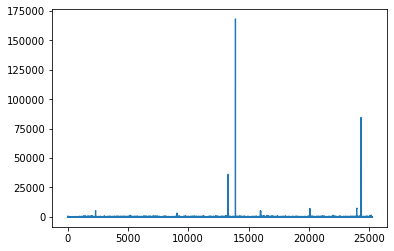

In [89]:
plt.plot(df['Weather Normalized Site EUI (kBtu/ft²)'])

<AxesSubplot:ylabel='Weather Normalized Site EUI (kBtu/ft²)'>

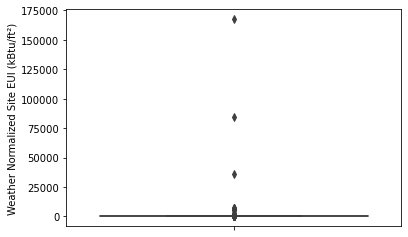

In [90]:
sns.boxplot(y=df['Weather Normalized Site EUI (kBtu/ft²)'])

<AxesSubplot:ylabel='Weather Normalized Site Energy Use (kBtu)'>

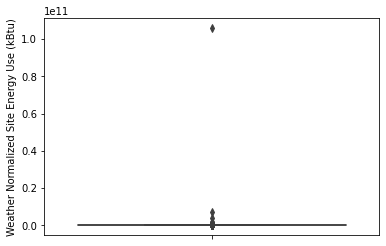

In [91]:
sns.boxplot(y=df['Weather Normalized Site Energy Use (kBtu)'])

<AxesSubplot:ylabel='Water Use Intensity (All Water Sources) (gal/ft²)'>

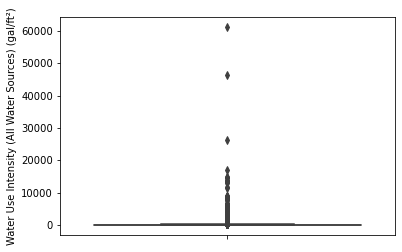

In [92]:
sns.boxplot(y=df['Water Use Intensity (All Water Sources) (gal/ft²)'])

In [93]:
df['Water Use Intensity (All Water Sources) (gal/ft²)'].describe()

count    13736.000000
mean       100.648817
std        837.679914
min          0.000000
25%         28.227500
50%         53.745000
75%         88.742500
max      61166.030000
Name: Water Use Intensity (All Water Sources) (gal/ft²), dtype: float64

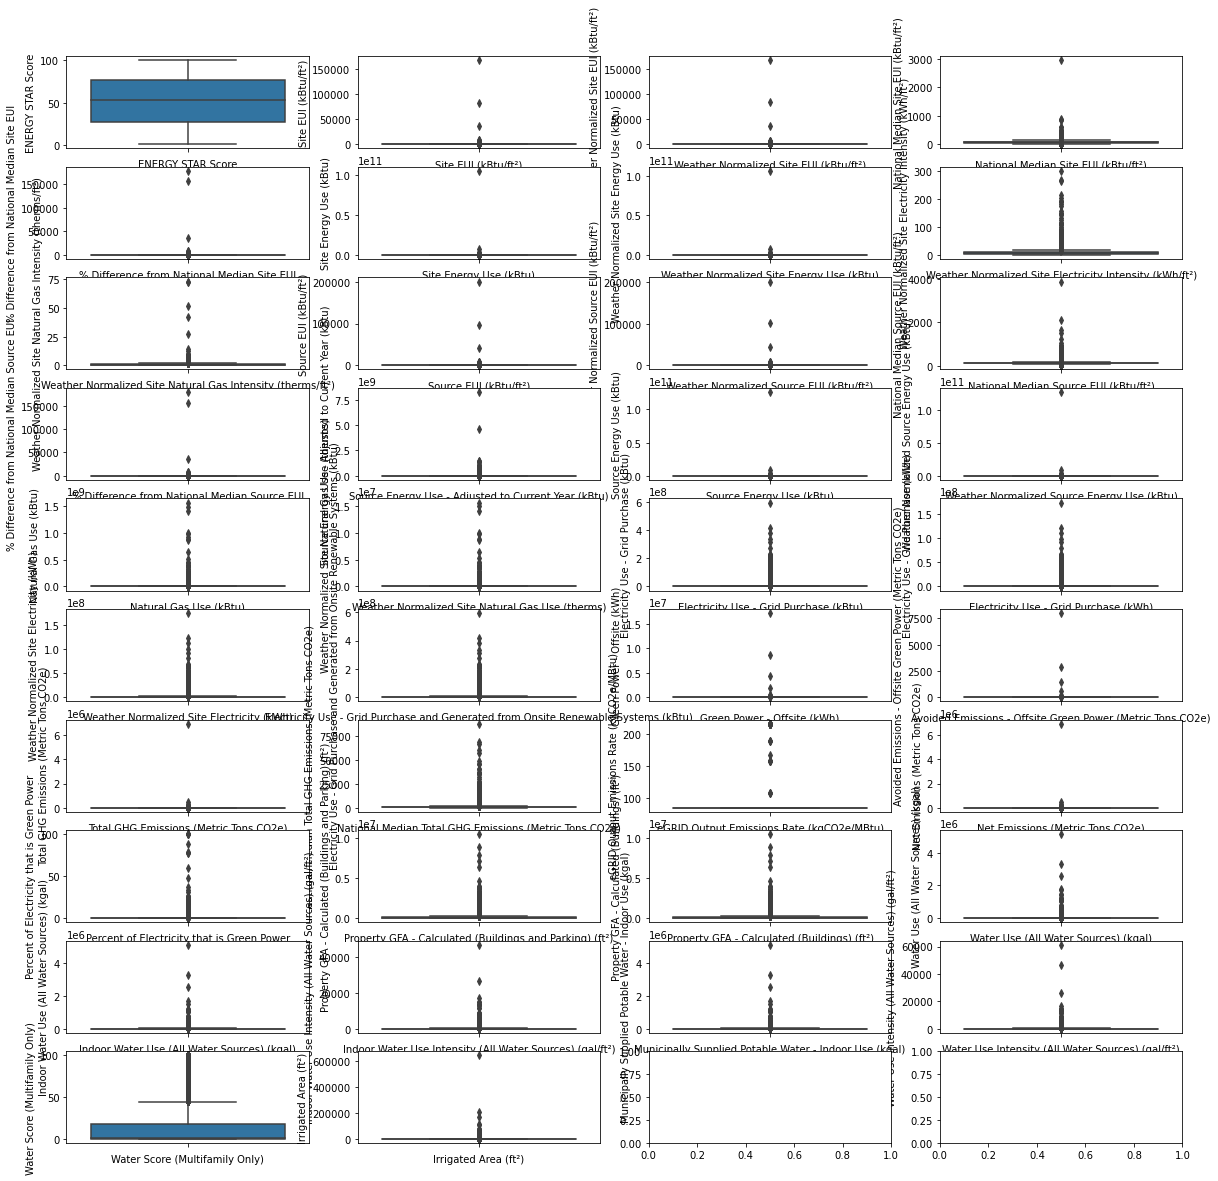

In [94]:
list_to_viz=['ENERGY STAR Score',
 'Site EUI (kBtu/ft²)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'National Median Site EUI (kBtu/ft²)',
 '% Difference from National Median Site EUI',
 'Site Energy Use (kBtu)',
 'Weather Normalized Site Energy Use (kBtu)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Source EUI (kBtu/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'National Median Source EUI (kBtu/ft²)',
 '% Difference from National Median Source EUI',
 'Source Energy Use - Adjusted to Current Year (kBtu)',
 'Source Energy Use (kBtu)',
 'Weather Normalized Source Energy Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use - Grid Purchase (kWh)',
 'Weather Normalized Site Electricity (kWh)',
 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
 'Green Power - Offsite (kWh)',
 'Avoided Emissions - Offsite Green Power (Metric Tons CO2e)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'National Median Total GHG Emissions (Metric Tons CO2e)',
 'eGRID Output Emissions Rate (kgCO2e/MBtu)',
 'Net Emissions (Metric Tons CO2e)',
 'Percent of Electricity that is Green Power',
 'Property GFA - Calculated (Buildings and Parking) (ft²)',
 'Property GFA - Calculated (Buildings) (ft²)',
 'Water Use (All Water Sources) (kgal)',
 'Indoor Water Use (All Water Sources) (kgal)',
 'Indoor Water Use Intensity (All Water Sources) (gal/ft²)',
 'Municipally Supplied Potable Water - Indoor Use (kgal)',
 'Water Use Intensity (All Water Sources) (gal/ft²)',
 'Water Score (Multifamily Only)',
 'Irrigated Area (ft²)']

fig, ax=plt.subplots(ncols=4, nrows=10, figsize=(20, 20))
ax=ax.flatten()

for i, feature in enumerate(list_to_viz):
    sns.boxplot(y=df[feature], ax=ax[i])
    ax[i].set_xlabel(feature)
    

In [95]:
df['National Median Site EUI (kBtu/ft²)'].nlargest()

12435    2940.3
16626     894.8
14899     859.3
23977     844.2
16618     600.2
Name: National Median Site EUI (kBtu/ft²), dtype: float64

### As we can see there are lot of outliers. Median is most suitable to fill the na values

In [96]:
df.reset_index(drop=True, inplace=True)

In [97]:
df['Weather Normalized Site Natural Gas Use (therms)'].describe()

count    2.130800e+04
mean     5.899508e+04
std      2.646618e+05
min      0.000000e+00
25%      8.443000e+03
50%      3.120020e+04
75%      5.532125e+04
max      1.558592e+07
Name: Weather Normalized Site Natural Gas Use (therms), dtype: float64

In [98]:
df[df['Weather Normalized Site Natural Gas Use (therms)']==0]

,Property Id,Property Name,Address 1,City,Postcode,Primary Property Type - Portfolio Manager-Calculated,Largest Property Use Type,Year Built,Number of Buildings,Occupancy,...,Water Score (Multifamily Only),Irrigated Area (ft²),Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Total Property Gross Floor Area
10,1143922,NE - 111 WALL STREET,111 WALL STREET,NEW YORK,10005,Office,Office,"1,968",1,60,...,0.0,NaN,MANHATTAN,40.704553,-74.006636,101.0,1.0,7.0,Battery Park City-Lower Manhattan,885474.0
349,1633510,X033-0200071,2424 Jerome Avenue,Bronx,10468,K-12 School,K-12 School,"1,900",1,100,...,0.0,NaN,BRONX,40.861850,-73.901760,205.0,14.0,239.0,Fordham South,84080.0
357,1633526,X425-0200217,800 East Gun Hill Road,Bronx,10467,K-12 School,K-12 School,"1,929",1,100,...,0.0,NaN,BRONX,40.875953,-73.861970,212.0,12.0,372.0,Williamsbridge-Olinville,390250.0
395,1633604,K391-0300333,790 East New York Avenue,Brooklyn,11203,K-12 School,K-12 School,"1,975",1,100,...,0.0,NaN,BROOKLYN,40.662447,-73.936382,309.0,41.0,876.0,Prospect Lefferts Gardens-Wingate,196800.0
750,1634345,X112-0200155,1925 Schieffelin Avenue,Bronx,10466,K-12 School,K-12 School,"1,954",1,100,...,0.0,NaN,BRONX,40.885008,-73.843193,212.0,12.0,458.0,Eastchester-Edenwald-Baychester,85325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23986,7145568,New York Equity - 214 West 30th st,214 West 30th st,New York,10001,Multifamily Housing,Multifamily Housing,"1,927",1,100,...,NaN,2300.0,MANHATTAN,40.748763,-73.993175,105.0,3.0,95.0,Midtown-Midtown South,30360.0
24177,7440880,300 Lafayette,"300 Lafayette St. New York, NY 10012",New York,10012,Office,Office,"2,017",1,95,...,0.0,0.0,MANHATTAN,40.724691,-73.995663,102.0,1.0,43.0,SoHo-TriBeCa-Civic Center-Little Italy,59757.0
24234,7468605,540 WEST 53 STREET,548 WEST 53 STREET,New York,10019,NaN,NaN,"2,019",1,50,...,0.0,0.0,MANHATTAN,40.767309,-73.992217,104.0,3.0,135.0,Clinton,0.0
24314,7533152,251-77 Jericho Turnpike,251-77 Jericho Turnpike,Queens,11426,Office,Office,"2,014",1,100,...,0.0,NaN,QUEENS,40.726844,-73.713514,413.0,23.0,1617.0,Bellerose,58236.0


In [99]:
df['Primary Property Type - Portfolio Manager-Calculated']

0                     Office
1                     Office
2           Financial Office
3                     Office
4                     Office
                ...         
24364    Multifamily Housing
24365    Multifamily Housing
24366                  Other
24367    Multifamily Housing
24368    Multifamily Housing
Name: Primary Property Type - Portfolio Manager-Calculated, Length: 24369, dtype: object

In [100]:
list_to_viz

['ENERGY STAR Score',
 'Site EUI (kBtu/ft²)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'National Median Site EUI (kBtu/ft²)',
 '% Difference from National Median Site EUI',
 'Site Energy Use (kBtu)',
 'Weather Normalized Site Energy Use (kBtu)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Source EUI (kBtu/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'National Median Source EUI (kBtu/ft²)',
 '% Difference from National Median Source EUI',
 'Source Energy Use - Adjusted to Current Year (kBtu)',
 'Source Energy Use (kBtu)',
 'Weather Normalized Source Energy Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use - Grid Purchase (kWh)',
 'Weather Normalized Site Electricity (kWh)',
 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
 'Green Power - Offsite (kWh)',
 'A

In [101]:
df['Primary Property Type - Portfolio Manager-Calculated'].unique()

array(['Office', 'Financial Office',
       'Hospital (General Medical & Surgical)', 'Retail Store', 'Other',
       'Laboratory', 'Mixed Use Property', 'Multifamily Housing', 'Hotel',
       'K-12 School', 'Museum', 'Medical Office', 'Other - Education',
       'Non-Refrigerated Warehouse', 'College/University',
       'Senior Care Community', 'Residence Hall/Dormitory', nan,
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Self-Storage Facility', 'Distribution Center', 'Enclosed Mall',
       'Parking', 'Library', 'Other - Recreation',
       'Other - Specialty Hospital',
       'Urgent Care/Clinic/Other Outpatient',
       'Ambulatory Surgical Center', 'Courthouse', 'Other - Mall',
       'Movie Theater', 'Other - Services', 'Refrigerated Warehouse',
       'Other - Lodging/Residential', 'Manufacturing/Industrial Plant',
       'Outpatient Rehabilitation/Physical Therapy', 'Worship Facility',
       'Strip Mall', 'Restaurant', 'Automobile Dealership',
       'S

In [102]:
m_v=df.groupby('Primary Property Type - Portfolio Manager-Calculated')['ENERGY STAR Score'].median()
m_v.isna()

Primary Property Type - Portfolio Manager-Calculated
Adult Education                True
Ambulatory Surgical Center     True
Automobile Dealership          True
Bank Branch                   False
Bowling Alley                  True
                              ...  
Vocational School              True
Wastewater Treatment Plant    False
Wholesale Club/Supercenter    False
Worship Facility              False
Zoo                            True
Name: ENERGY STAR Score, Length: 71, dtype: bool

In [103]:
df[df['Primary Property Type - Portfolio Manager-Calculated']=='Zoo']['ENERGY STAR Score']

15489   NaN
15981   NaN
15985   NaN
Name: ENERGY STAR Score, dtype: float64

In [104]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
# null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
# null_df
null_df=null_df[null_df['Null Count']>0]
null_df

,Null Count
Primary Property Type - Portfolio Manager-Calculated,7
Largest Property Use Type,7
Metered Areas (Energy),429
Metered Areas (Water),12200
ENERGY STAR Score,4561
Site EUI (kBtu/ft²),498
Weather Normalized Site EUI (kBtu/ft²),2159
National Median Site EUI (kBtu/ft²),330
% Difference from National Median Site EUI,810
Site Energy Use (kBtu),496


In [105]:
list_to_viz

['ENERGY STAR Score',
 'Site EUI (kBtu/ft²)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'National Median Site EUI (kBtu/ft²)',
 '% Difference from National Median Site EUI',
 'Site Energy Use (kBtu)',
 'Weather Normalized Site Energy Use (kBtu)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Source EUI (kBtu/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'National Median Source EUI (kBtu/ft²)',
 '% Difference from National Median Source EUI',
 'Source Energy Use - Adjusted to Current Year (kBtu)',
 'Source Energy Use (kBtu)',
 'Weather Normalized Source Energy Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use - Grid Purchase (kWh)',
 'Weather Normalized Site Electricity (kWh)',
 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
 'Green Power - Offsite (kWh)',
 'A

In [106]:
df['Primary Property Type - Portfolio Manager-Calculated'].isna().sum()

7

In [107]:
df.dropna(subset=['Primary Property Type - Portfolio Manager-Calculated'], inplace=True)

In [108]:
for column in list_to_viz:
    median_values = df.groupby('Primary Property Type - Portfolio Manager-Calculated')[column].median()
    df[column] = df.apply(lambda row: median_values[row['Primary Property Type - Portfolio Manager-Calculated']] if pd.isna(row[column]) else row[column], axis=1)

In [109]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
# null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
# null_df
null_df=null_df[null_df['Null Count']>0]
null_df

,Null Count
Metered Areas (Energy),427
Metered Areas (Water),12196
ENERGY STAR Score,1984
Weather Normalized Site EUI (kBtu/ft²),1
National Median Site EUI (kBtu/ft²),322
% Difference from National Median Site EUI,322
Weather Normalized Site Energy Use (kBtu),1
Weather Normalized Site Electricity Intensity (kWh/ft²),1
Weather Normalized Site Natural Gas Intensity (therms/ft²),9
Weather Normalized Source EUI (kBtu/ft²),1


In [110]:
df.shape

(24362, 59)

In [111]:
df['Metered Areas  (Water)'].value_counts()

Whole Building                                       12119
Another configuration                                   18
Common areas (all energy loads)                         16
Tenant and/or common areas (partial energy loads)       10
Tenant areas (all energy loads)                          3
Name: Metered Areas  (Water), dtype: int64

In [112]:
df['Metered Areas (Energy)'].value_counts()

Whole Building                                                                                                                                   23871
Another configuration                                                                                                                               51
Common areas (all energy loads)                                                                                                                      6
Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity                                                                      1
Common Area Plug Load/Electricity, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Cooling                                                 1
Tenant Hot Water, Tenant Heating, Common Area Heating, Common Area Plug Load/Electricity, Common Area Hot Water, Common Area Cooling                 1
Tenant areas (all energy loads)                                                               

In [113]:
categorical_cols=['Metered Areas  (Water)', 'Metered Areas (Energy)']

for col in categorical_cols:
    df[col]=df[col].fillna(df[col].mode().iloc[0])

In [114]:
df['Metered Areas  (Water)'].value_counts()

Whole Building                                       24315
Another configuration                                   18
Common areas (all energy loads)                         16
Tenant and/or common areas (partial energy loads)       10
Tenant areas (all energy loads)                          3
Name: Metered Areas  (Water), dtype: int64

In [115]:
df['Metered Areas (Energy)'].value_counts()

Whole Building                                                                                                                                   24298
Another configuration                                                                                                                               51
Common areas (all energy loads)                                                                                                                      6
Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity                                                                      1
Common Area Plug Load/Electricity, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Cooling                                                 1
Tenant Hot Water, Tenant Heating, Common Area Heating, Common Area Plug Load/Electricity, Common Area Hot Water, Common Area Cooling                 1
Tenant areas (all energy loads)                                                               

In [116]:
df[['Metered Areas  (Water)', 'Metered Areas (Energy)']].isna().sum()

Metered Areas  (Water)    0
Metered Areas (Energy)    0
dtype: int64

In [117]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
# null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
# null_df
null_df=null_df[null_df['Null Count']>0]
null_df

,Null Count
ENERGY STAR Score,1984
Weather Normalized Site EUI (kBtu/ft²),1
National Median Site EUI (kBtu/ft²),322
% Difference from National Median Site EUI,322
Weather Normalized Site Energy Use (kBtu),1
Weather Normalized Site Electricity Intensity (kWh/ft²),1
Weather Normalized Site Natural Gas Intensity (therms/ft²),9
Weather Normalized Source EUI (kBtu/ft²),1
National Median Source EUI (kBtu/ft²),322
% Difference from National Median Source EUI,322


In [118]:
df.shape

(24362, 59)

In [119]:
save_to_folder(df, 5)

In [120]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
# null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
# null_df
null_df=null_df[null_df['Null Count']>0]
null_df

,Null Count
ENERGY STAR Score,1984
Weather Normalized Site EUI (kBtu/ft²),1
National Median Site EUI (kBtu/ft²),322
% Difference from National Median Site EUI,322
Weather Normalized Site Energy Use (kBtu),1
Weather Normalized Site Electricity Intensity (kWh/ft²),1
Weather Normalized Site Natural Gas Intensity (therms/ft²),9
Weather Normalized Source EUI (kBtu/ft²),1
National Median Source EUI (kBtu/ft²),322
% Difference from National Median Source EUI,322


In [121]:
df[df['ENERGY STAR Score'].isna()]['Primary Property Type - Portfolio Manager-Calculated'].unique()

array(['Other', 'Laboratory', 'Museum', 'Other - Education',
       'College/University', 'Other - Entertainment/Public Assembly',
       'Self-Storage Facility', 'Enclosed Mall', 'Parking', 'Library',
       'Other - Recreation', 'Other - Specialty Hospital',
       'Urgent Care/Clinic/Other Outpatient',
       'Ambulatory Surgical Center', 'Other - Mall', 'Movie Theater',
       'Other - Services', 'Other - Lodging/Residential',
       'Manufacturing/Industrial Plant',
       'Outpatient Rehabilitation/Physical Therapy', 'Strip Mall',
       'Restaurant', 'Automobile Dealership', 'Social/Meeting Hall',
       'Residential Care Facility', 'Other - Technology/Science',
       'Other - Restaurant/Bar', 'Fitness Center/Health Club/Gym',
       'Performing Arts', 'Adult Education',
       'Repair Services (Vehicle, Shoe, Locksmith, etc.)',
       'Pre-school/Daycare', 'Mailing Center/Post Office',
       'Prison/Incarceration', 'Food Service', 'Other - Public Services',
       'Veterinary

In [122]:
df[df['Primary Property Type - Portfolio Manager-Calculated']=='Food Sales']['ENERGY STAR Score']

20162   NaN
23142   NaN
23489   NaN
23514   NaN
Name: ENERGY STAR Score, dtype: float64

In [123]:
null_df

,Null Count
ENERGY STAR Score,1984
Weather Normalized Site EUI (kBtu/ft²),1
National Median Site EUI (kBtu/ft²),322
% Difference from National Median Site EUI,322
Weather Normalized Site Energy Use (kBtu),1
Weather Normalized Site Electricity Intensity (kWh/ft²),1
Weather Normalized Site Natural Gas Intensity (therms/ft²),9
Weather Normalized Source EUI (kBtu/ft²),1
National Median Source EUI (kBtu/ft²),322
% Difference from National Median Source EUI,322


In [124]:
features_with_low_na=null_df[null_df.values<500].index.tolist()
features_with_low_na

['Weather Normalized Site EUI (kBtu/ft²)',
 'National Median Site EUI (kBtu/ft²)',
 '% Difference from National Median Site EUI',
 'Weather Normalized Site Energy Use (kBtu)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'National Median Source EUI (kBtu/ft²)',
 '% Difference from National Median Source EUI',
 'Weather Normalized Source Energy Use (kBtu)',
 'Natural Gas Use (kBtu)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Electricity Use - Grid Purchase (kWh)',
 'Weather Normalized Site Electricity (kWh)',
 'Electricity Use - Grid Purchase and Generated from Onsite Renewable Systems (kBtu)',
 'Green Power - Offsite (kWh)',
 'Avoided Emissions - Offsite Green Power (Metric Tons CO2e)',
 'National Median Total GHG Emissions (Metric Tons CO2e)',
 'Percent of Electricity that is Green Power',
 'Water Use (All W

In [125]:
df.shape

(24362, 59)

In [126]:
df.dropna(subset=features_with_low_na,inplace=True)

In [127]:
df.shape

(23656, 59)

In [128]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
# null_df[null_df['Null Count']>0].sort_values(by=['Null Count'], ascending=False)
# null_df
null_df=null_df[null_df['Null Count']>0]
null_df

,Null Count
ENERGY STAR Score,1332
Source Energy Use - Adjusted to Current Year (kBtu),1332


In [129]:
mask=df['ENERGY STAR Score'].isnull() & df['Source Energy Use - Adjusted to Current Year (kBtu)'].isnull()
records=df[mask]

In [130]:
records[['ENERGY STAR Score', 'Source Energy Use - Adjusted to Current Year (kBtu)']]

,ENERGY STAR Score,Source Energy Use - Adjusted to Current Year (kBtu)
20,NaN,NaN
21,NaN,NaN
22,NaN,NaN
972,NaN,NaN
976,NaN,NaN
...,...,...
24305,NaN,NaN
24311,NaN,NaN
24318,NaN,NaN
24357,NaN,NaN


In [131]:
df.dropna(how='all', subset=['ENERGY STAR Score', 'Source Energy Use - Adjusted to Current Year (kBtu)'], inplace=True)

In [132]:
df.shape

(22324, 59)

In [133]:
null_df=pd.DataFrame(df.isna().sum(), columns=['Null Count'])
null_df

,Null Count
Property Id,0
Property Name,0
Address 1,0
City,0
Postcode,0
Primary Property Type - Portfolio Manager-Calculated,0
Largest Property Use Type,0
Year Built,0
Number of Buildings,0
Occupancy,0


In [134]:
save_to_folder(df, 6)

In [135]:
df.dtypes

Property Id                                                                             int64
Property Name                                                                          object
Address 1                                                                              object
City                                                                                   object
Postcode                                                                               object
Primary Property Type - Portfolio Manager-Calculated                                   object
Largest Property Use Type                                                              object
Year Built                                                                             object
Number of Buildings                                                                     int64
Occupancy                                                                               int64
Metered Areas (Energy)                                      

In [136]:
 df['Postcode'].value_counts()

11226        428
10025        418
10452        415
10011        405
10467        400
            ... 
112013873      1
100168402      1
10115          1
10055          1
104467         1
Name: Postcode, Length: 269, dtype: int64

In [137]:
df['Year Built'].unique()

array(['1,982', '1,956', '1,989', '1,961', '1,999', '1,932', '1,991',
       '1,994', '1,967', '1,928', '1,968', '1,986', '1,997', '2,004',
       '1,984', '1,974', '1,959', '2,001', '1,972', '1,970', '2,003',
       '1,971', '1,965', '1,964', '1,957', '1,920', '1,979', '1,927',
       '1,955', '1,951', '1,963', '1,988', '1,985', '2,007', '1,969',
       '1,922', '1,958', '1,960', '1,980', '1,926', '1,915', '2,000',
       '1,886', '1,906', '1,949', '1,929', '1,983', '1,990', '1,930',
       '1,992', '1,998', '1,962', '1,981', '1,966', '1,975', '1,896',
       '1,935', '1,973', '1,905', '1,925', '1,900', '1,904', '1,987',
       '1,940', '1,931', '1,950', '1,914', '1,924', '1,939', '1,907',
       '1,916', '1,911', '1,921', '1,923', '1,953', '1,978', '1,976',
       '1,937', '1,952', '1,936', '1,954', '1,910', '1,938', '1,995',
       '1,903', '1,912', '1,889', '1,908', '1,933', '2,002', '1,947',
       '1,919', '1,901', '1,917', '1,893', '1,909', '1,948', '1,993',
       '1,943', '1,9

In [138]:
df['Year Built']=df['Year Built'].str.replace(',','').astype('int64')
df['Year Built']

0        1982
1        1956
2        1989
3        1961
4        1999
         ... 
24363    1931
24364    1961
24365    1965
24367    1978
24368    1978
Name: Year Built, Length: 22324, dtype: int64

In [139]:
df.dtypes

Property Id                                                                             int64
Property Name                                                                          object
Address 1                                                                              object
City                                                                                   object
Postcode                                                                               object
Primary Property Type - Portfolio Manager-Calculated                                   object
Largest Property Use Type                                                              object
Year Built                                                                              int64
Number of Buildings                                                                     int64
Occupancy                                                                               int64
Metered Areas (Energy)                                      

In [140]:
save_to_folder(df, 7)

In [142]:
df.isna().sum()

Property Id                                                                           0
Property Name                                                                         0
Address 1                                                                             0
City                                                                                  0
Postcode                                                                              0
Primary Property Type - Portfolio Manager-Calculated                                  0
Largest Property Use Type                                                             0
Year Built                                                                            0
Number of Buildings                                                                   0
Occupancy                                                                             0
Metered Areas (Energy)                                                                0
Metered Areas  (Water)          

In [143]:
df['Property Id'].nunique()

21921

In [144]:
df.shape

(22324, 59)